In [1]:
import getpass
import mysql.connector
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import random
import seaborn as sns
print("All necessary packages are imported!")

All necessary packages are imported!


In [2]:
def getconnection():
    mydb = mysql.connector.connect(
        host="localhost",
        user=input("Enter username: "),
        password=getpass.getpass("Enter password: "),
        database="imdbtop250"
    )

    return mydb
connection = getconnection()

Enter username:  root
Enter password:  ········


#### 1. How many movies are in top 250 list where made each year over the past 30 years?

In [3]:
pd.read_sql('SELECT Year, COUNT(*) AS Total_Mvoie \
             FROM movies \
             GROUP BY Year \
             HAVING Year BETWEEN 1990 AND 2020 \
             ORDER BY Year ASC', con=connection)

,Year,Total_Mvoie
0,1990,1
1,1991,3
2,1992,2
3,1993,3
4,1994,6
5,1995,8
6,1996,3
7,1997,5
8,1998,5
9,1999,5


#### 2. List all the directors who directed a 'Drama' movie.

In [4]:
pd.read_sql('SELECT Movie, Director \
             FROM movies \
             WHERE Genre LIKE "%Drama%" ', con=connection)

,Movie,Director
0,The Shawshank Redemption,Frank Darabont
1,The Godfather,Francis Ford Coppola
2,The Dark Knight,Christopher Nolan
3,The Godfather: Part II,Francis Ford Coppola
4,Pulp Fiction,Quentin Tarantino
...,...,...
164,In the Name of the Father,Jim Sheridan
165,Amores Perros,Alejandro G. Iñárritu
166,Network,Sidney Lumet
167,Persona,Ingmar Bergman


#### 3. How many directors are in top 250 movies have directed a movie more than twice?

In [5]:
pd.read_sql('SELECT Director, COUNT(*) AS Total_Appearance FROM movies \
             GROUP BY Director HAVING COUNT(Director) > 2 ORDER BY Total_Appearance DESC', con=connection)

,Director,Total_Appearance
0,Christopher Nolan,7
1,Steven Spielberg,7
2,Martin Scorsese,7
3,Stanley Kubrick,7
4,Alfred Hitchcock,6
5,Quentin Tarantino,5
6,Akira Kurosawa,5
7,Hayao Miyazaki,5
8,Charles Chaplin,5
9,Billy Wilder,5


#### 4. What is average ratings of Star Wars movie series?

In [6]:
pd.read_sql('SELECT ROUND(AVG(reviews.Rating), 3) AS Average_Rating FROM movies \
             INNER JOIN reviews ON movies.ID=reviews.movie_id WHERE Movie LIKE "Star Wars%" ', con=connection)

,Average_Rating
0,8.375


#### 5. What movie is the highest rating of Lord of the Rings sequel?

In [7]:
pd.read_sql('SELECT Movie, MAX(Rating) AS Best_of_the_Sequel FROM movies INNER JOIN reviews ON movies.ID=reviews.movie_id \
             WHERE Movie LIKE "The Lord of the Rings%" ', con=connection)

,Movie,Best_of_the_Sequel
0,The Lord of the Rings: The Return of the King,8.9


#### 6. List top 10 highest grossing movies with heir rating and show relase year on movie column.

In [8]:
pd.read_sql('SELECT CONCAT(Movie, " (", Year, ")") AS Movie, Rating, Gross_Total FROM movies \
             INNER JOIN reviews ON movies.id = reviews.movie_id \
             INNER JOIN gross_total ON reviews.movie_id = gross_total.movie_id \
             GROUP BY ID ORDER BY Gross_Total DESC LIMIT 10', con=connection)

,Movie,Rating,Gross_Total
0,Star Wars: Episode VII - The Force Awakens (2015),7.9,936.66
1,The Dark Knight (2008),9.0,534.86
2,The Dark Knight Rises (2012),8.4,448.14
3,The Lion King (1994),8.5,422.78
4,Toy Story 3 (2010),8.2,415.00
5,Jurassic Park (1993),8.1,402.45
6,Guardians of the Galaxy Vol. 2 (2017),7.6,389.81
7,Finding Nemo (2003),8.1,380.84
8,The Lord of the Rings: The Return of the King ...,8.9,377.85
9,The Jungle Book (2016),7.4,364.00


#### 7. Find the movies made from 1950 and 1960. What's their gross total, number of reviews, and ratings?

In [9]:
pd.read_sql('SELECT Movie, Year, Gross_Total, Total_Rate, Rating FROM movies \
             INNER JOIN reviews ON movies.id = reviews.movie_id \
             INNER JOIN gross_total ON reviews.movie_id = gross_total.movie_id \
             WHERE Year BETWEEN 1950 AND 1960 \
             GROUP BY ID \
             ORDER BY Year', con=connection)

,Movie,Year,Gross_Total,Total_Rate,Rating
0,Sunset Blvd.,1950,NaN,201121,8.4
1,All About Eve,1950,0.01,120313,8.2
2,Rashômon,1950,0.10,152173,8.2
3,Singin' in the Rain,1952,8.82,218432,8.3
4,Ikiru,1952,0.06,68191,8.3
5,The Wages of Fear,1953,NaN,54450,8.1
6,Seven Samurai,1954,0.27,315027,8.6
7,Rear Window,1954,36.76,443114,8.4
8,On the Waterfront,1954,9.60,141787,8.1
9,Dial M for Murder,1954,0.01,157892,8.2


Now, let's step into `Pandas` package in Python environment. Until now, we were just reading tables with Pandas. We could assign those readings into Pandas dataframe when we read them, but better off start from scratch with Pandas.<br>
First, load each tables from `MySQL Database` and assign them.

In [10]:
df_movies = pd.read_sql('SELECT * FROM movies', con=connection)
df_movies.head()

,ID,Movie,Year,Run_Time,Genre,Director,Actors
0,1,The Shawshank Redemption,1994,142,Drama,Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi..."
1,2,The Godfather,1972,175,"Crime, Drama",Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Diane Ke..."
2,3,The Dark Knight,2008,152,"Action, Crime, Drama",Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M..."
3,4,The Godfather: Part II,1974,202,"Crime, Drama",Francis Ford Coppola,"Al Pacino, Robert De Niro, Robert Duvall, Dian..."
4,5,Pulp Fiction,1994,154,"Crime, Drama",Quentin Tarantino,"John Travolta, Uma Thurman, Samuel L. Jackson,..."


In [11]:
df_reviews = pd.read_sql('SELECT * FROM reviews', con=connection)
df_reviews.head()

,movie_id,Rating,Total_Rate
0,1,9.3,2336847
1,2,9.2,1615717
2,3,9.0,2297583
3,4,9.0,1127109
4,5,8.9,1821793


In [12]:
df_gross_total = pd.read_sql('SELECT * FROM gross_total', con=connection)
df_gross_total.head()

,movie_id,Gross_Total
0,1,28.34
1,2,134.97
2,3,534.86
3,4,57.30
4,5,107.93


In [13]:
# Join all three df with concat() function.
# Reset indexes before concat them. Otherwise it might give NaN values
df_movies.reset_index(drop=True, inplace=True)
df_reviews.reset_index(drop=True, inplace=True)
df_gross_total.reset_index(drop=True, inplace=True)
# concat them
df_combined = pd.concat([df_movies, df_reviews, df_gross_total], axis=1)
df_combined

,ID,Movie,Year,Run_Time,Genre,Director,Actors,movie_id,Rating,Total_Rate,movie_id,Gross_Total
0,1,The Shawshank Redemption,1994,142,Drama,Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",1,9.3,2336847,1,28.34
1,2,The Godfather,1972,175,"Crime, Drama",Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Diane Ke...",2,9.2,1615717,2,134.97
2,3,The Dark Knight,2008,152,"Action, Crime, Drama",Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",3,9.0,2297583,3,534.86
3,4,The Godfather: Part II,1974,202,"Crime, Drama",Francis Ford Coppola,"Al Pacino, Robert De Niro, Robert Duvall, Dian...",4,9.0,1127109,4,57.30
4,5,Pulp Fiction,1994,154,"Crime, Drama",Quentin Tarantino,"John Travolta, Uma Thurman, Samuel L. Jackson,...",5,8.9,1821793,5,107.93
...,...,...,...,...,...,...,...,...,...,...,...,...
245,246,Nausicaä of the Valley of the Wind,1984,117,"Animation, Adventure, Fantasy",Hayao Miyazaki,"Sumi Shimamoto, Mahito Tsujimura, Hisako Kyôda...",246,8.1,150403,246,0.50
246,247,The Maltese Falcon,1941,100,"Film-Noir, Mystery",John Huston,"Humphrey Bogart, Mary Astor, Gladys George, Pe...",247,8.0,148677,247,2.11
247,248,Persona,1966,83,"Drama, Thriller",Ingmar Bergman,"Bibi Andersson, Liv Ullmann, Margaretha Krook,...",248,8.1,102775,248,NaN
248,249,The Grapes of Wrath,1940,129,"Drama, History",John Ford,"Henry Fonda, Jane Darwell, John Carradine, Cha...",249,8.0,85492,249,0.06


In [14]:
df = df_combined.drop(['ID', 'movie_id'], axis=1)
df.head(1)

,Movie,Year,Run_Time,Genre,Director,Actors,Rating,Total_Rate,Gross_Total
0,The Shawshank Redemption,1994,142,Drama,Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",9.3,2336847,28.34


Looking good! Now, let's how many movies each genre.

In [15]:
df_genres = pd.DataFrame(df['Genre'].str.split(',\s+', expand=True).stack().value_counts())
df_genres = df_genres.reset_index()
df_genres.columns = ['Genre', 'Total_Movie']
df_genres.head()

,Genre,Total_Movie
0,Drama,169
1,Adventure,61
2,Crime,54
3,Action,49
4,Comedy,46


Let's see how many movies each actor/actress has in the top 250.

In [16]:
df_actors = pd.DataFrame(df['Actors'].str.split(',\s+', expand=True).stack().value_counts())
df_actors = df_actors.reset_index()
df_actors.columns = ['Actors', 'Number_of_Movies']
df_actors.head(10)

,Actors,Number_of_Movies
0,Robert De Niro,8
1,Tom Hanks,6
2,Brad Pitt,6
3,Leonardo DiCaprio,6
4,Harrison Ford,6
5,Clint Eastwood,5
6,Matt Damon,5
7,Christian Bale,5
8,Aamir Khan,5
9,Charles Chaplin,5


Same with directors.

In [17]:
df_director = (pd.DataFrame(df_combined['Director'].value_counts())).reset_index().set_axis(['Director', 'Number_of_Movies'], axis=1)
df_director

,Director,Number_of_Movies
0,Christopher Nolan,7
1,Stanley Kubrick,7
2,Steven Spielberg,7
3,Martin Scorsese,7
4,Alfred Hitchcock,6
...,...,...
159,Michael Mann,1
160,John McTiernan,1
161,James Gunn,1
162,Oliver Stone,1


In [18]:
df_director_gross= df.groupby(by=['Director'], as_index=False)['Gross_Total'].sum().sort_values(by='Gross_Total', ascending = False)
df_director_gross.head(10)

,Director,Gross_Total
21,Christopher Nolan,1749.08
146,Steven Spielberg,1568.54
114,Peter Jackson,1035.94
63,J.J. Abrams,936.66
132,Robert Zemeckis,540.86
92,Martin Scorsese,518.21
118,Quentin Tarantino,464.21
134,"Roger Allers, Rob Minkoff",422.78
85,Lee Unkrich,415.00
65,James Gunn,389.81


In [19]:
splitted = df['Genre'].str.split(', ')
len_ = splitted.str.len()
df1 = pd.DataFrame({'gross': np.repeat(df['Gross_Total'], len_), 'Genres':np.concatenate(splitted)})
col = {'sum':'Total_in_Mil'}
df_genre_gross = df1.groupby('Genres')['gross'].agg(['sum']).rename(columns = col)
df_genre_gross = df_genre_gross.sort_values(by=['Total_in_Mil'], ascending=False).reset_index()
df_genre_gross

,Genres,Total_in_Mil
0,Adventure,11125.40
1,Drama,9712.50
2,Action,8189.93
3,Comedy,3801.29
4,Sci-Fi,3538.12
5,Animation,3301.61
6,Crime,2895.53
7,Thriller,2345.01
8,Fantasy,2081.81
9,Mystery,1400.26


Now, let's visualize our data with Python visualizing packages.

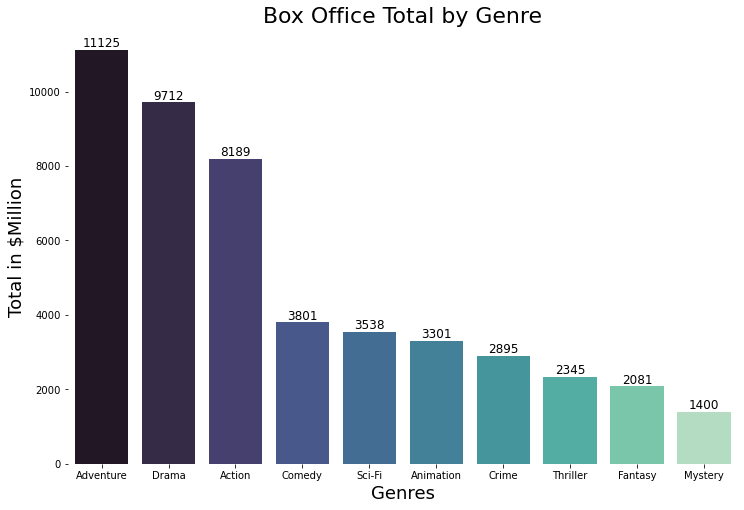

In [20]:
fig = plt.figure(figsize=(12,8))
plt.subplot()
ax = sns.barplot(x = df_genre_gross['Genres'][:10], 
                 y = df_genre_gross['Total_in_Mil'][:10],
                 palette="mako")

for i, val in enumerate(df_genre_gross['Total_in_Mil'][:10]):
    plt.text(i, val, int(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})

plt.title("Box Office Total by Genre", fontsize=22)
plt.xlabel("Genres", fontsize=18)
plt.ylabel("Total in $Million", fontsize=18)
plt.style.use('ggplot')
plt.box(False)
loc, labels = plt.xticks()
ax.set_xticklabels(labels, rotation=0)
plt.show()

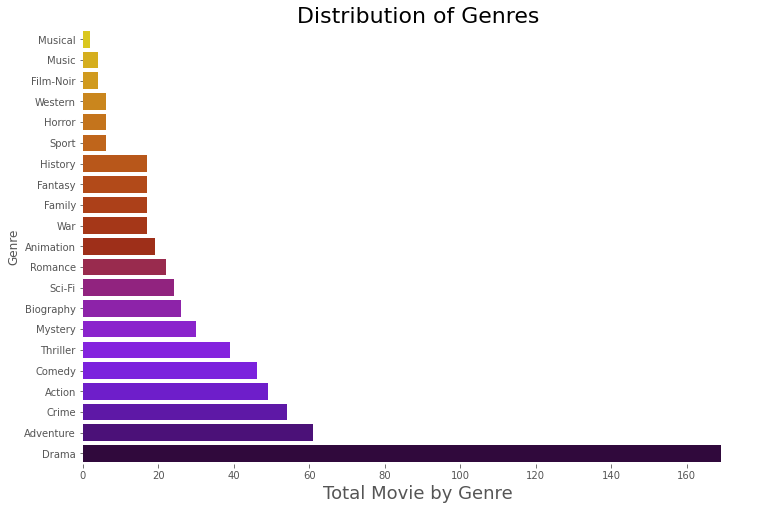

In [21]:
ordered = df_genres.sort_values('Total_Movie', ascending=True)

fig = plt.figure(figsize=(12,8))
ax = sns.barplot(x = ordered['Total_Movie'], 
                 y = ordered['Genre'], 
                 palette="gnuplot_r")

plt.title("Distribution of Genres", fontsize=22)
plt.xlabel("Total Movie by Genre", fontsize=18)
plt.style.use('fivethirtyeight')
plt.box(False)
plt.show()

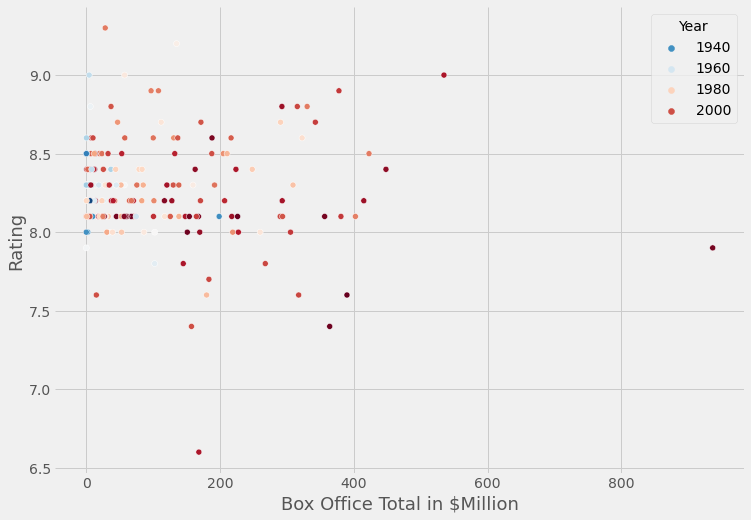

In [22]:
fig = plt.figure(figsize=(11,8))
ax = sns.scatterplot(x = df['Gross_Total'], y = df['Rating'], hue=df['Year'], palette="RdBu_r")
plt.style.use('fivethirtyeight')
plt.box(False)
plt.xlabel("Box Office Total in $Million", fontsize=18)
plt.ylabel("Rating", fontsize=18)
plt.show()

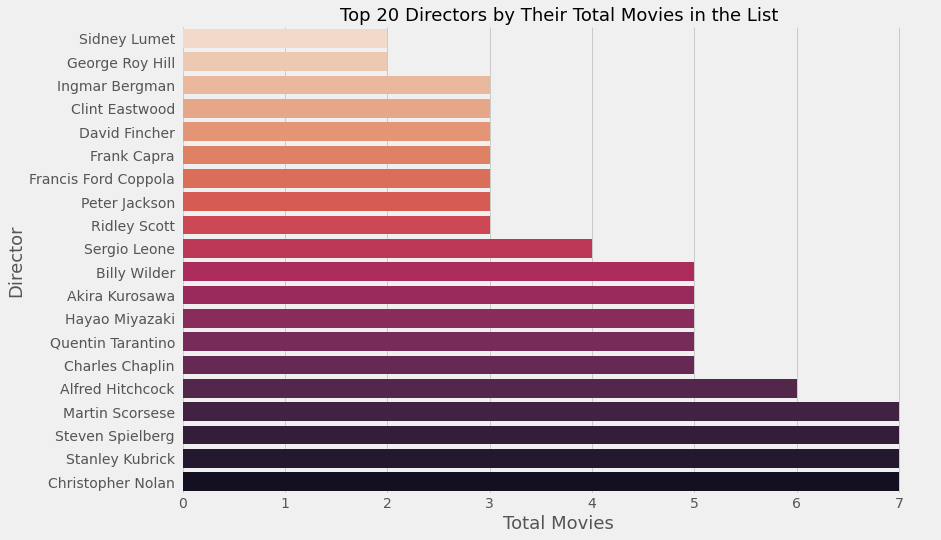

In [23]:
ordered_director = df_director.sort_values('Number_of_Movies', ascending=True)[-20:]

fig = plt.figure(figsize=(12,8))
plt.subplot()
ax = sns.barplot(x = ordered_director['Number_of_Movies'], 
                 y = ordered_director['Director'],
                 palette="rocket_r")

plt.title("Top 20 Directors by Their Total Movies in the List", fontsize=18)
plt.xlabel("Total Movies", fontsize=18)
plt.ylabel("Director", fontsize=18)
plt.style.use('ggplot')
plt.box(False)
plt.show()

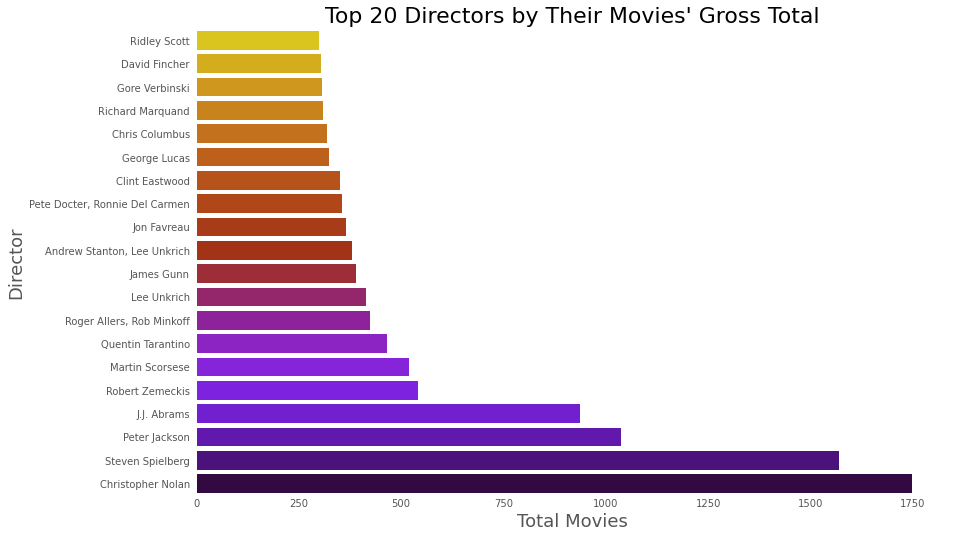

In [24]:
ordered_dir_gross = df_director_gross.sort_values('Gross_Total', ascending=True)[-20:]

fig = plt.figure(figsize=(12,8))
ax = sns.barplot(x = ordered_dir_gross['Gross_Total'], 
                 y = ordered_dir_gross['Director'], 
                 palette="gnuplot_r")

plt.title("Top 20 Directors by Their Movies' Gross Total", fontsize=22)
plt.xlabel("Total Movies", fontsize=18)
plt.ylabel("Director", fontsize=18)
plt.style.use('fivethirtyeight')
plt.box(False)
plt.show()

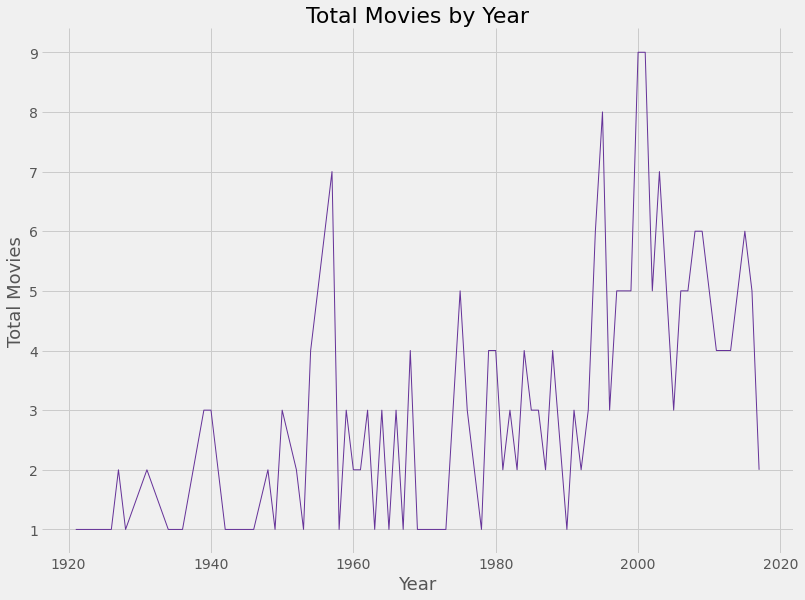

In [25]:
movies_by_year = df.groupby(['Year']).size()

fig = plt.figure(figsize=(12,9))
ax = sns.lineplot(x = movies_by_year.index, y = movies_by_year, 
                  linewidth = 1, palette="gnuplot_r", color = 'rebeccapurple')
plt.style.use('fivethirtyeight')
plt.box(False)
plt.title("Total Movies by Year", fontsize=22)
plt.xlabel("Year", fontsize=18)
plt.ylabel("Total Movies", fontsize=18)
plt.show()

In [26]:
connection.close()